# **Linear Regression**

**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Implementation**

In [2]:
class LinearRegression:
    # Constructor to initialize the values of hyperparameters
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # Fit function to fit the model
    def fit(self, X, Y):
        # Number of training examples & number of input features
        self.m, self.n = X.shape

        # Initiating weights (w) & bias (b)
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_weights()

    # Updating the parameters using this function
    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # Calculate gradients
        dw = - (2 / self.m) * np.dot(self.X.T, (self.Y - Y_prediction))
        db = - (2 / self.m) * np.sum(self.Y - Y_prediction)

        # Update weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    # Return the prediction for given value(s) X
    def predict(self, X):
        return np.dot(X, self.w) + self.b

**Training Linear Regression Model on Dataset**

In [3]:
ds = pd.read_csv("/content/drive/MyDrive/Datasets/salary_data.csv")
ds.shape

(2217, 2)

In [4]:
ds.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
ds.tail()

,YearsExperience,Salary
2212,23.3,254396
2213,23.7,244176
2214,15.7,170218
2215,5.0,70881
2216,13.7,152679


**Data Preprocessing**

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  2217 non-null   float64
 1   Salary           2217 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 34.8 KB


In [7]:
ds.describe()

,YearsExperience,Salary
count,2217.000000,2217.000000
mean,12.199910,141158.828146
std,7.209522,68201.505858
min,0.000000,18581.000000
25%,5.800000,80992.000000
50%,12.100000,139452.000000
75%,18.600000,200821.000000
max,25.000000,270450.000000


In [8]:
ds.isnull().sum()

,0
YearsExperience,0
Salary,0


In [9]:
X = ds.drop(columns="Salary", axis=1)
Y = ds["Salary"]

**Training Testing Dataset**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(2217, 1) (1995, 1) (222, 1)


**Model Training**

In [12]:
model = LinearRegression(learning_rate=0.00002, no_of_iterations=100000)

In [13]:
model.fit(X_train, Y_train)

In [14]:
print(f"Weights: {model.w}")
print(f"Bias: {model.b}")

Weights: [9987.71132439]
Bias: 17029.81560227714


**Model Prediction on Training Dataset**

In [15]:
Y_train_pred = model.predict(X_train)

**Model Prediction on Testing Dataset**

In [16]:
Y_test_pred = model.predict(X_test)

Visualization

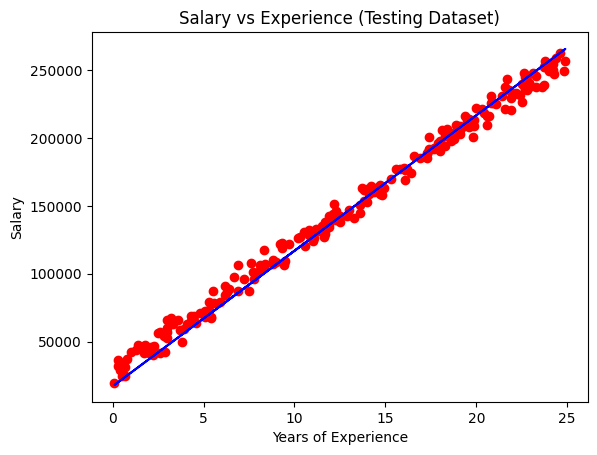

In [17]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, Y_test_pred, color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Testing Dataset)")
plt.show()